Actividad Guiada 2 de Algoritmos de Optimización

Nombre: José Pablo Cifuentes Sánchez

https://colab.research.google.com/drive/1vAenRsCeokb5hUt8p01SVKNwgsPVpjel?usp=sharing

https://github.com/jpcifuentes16/03MIAR---Algoritmos-de-Optimizacion--2022.git


In [ ]:
import math

# Programación Dinámica: Viaje por el rio


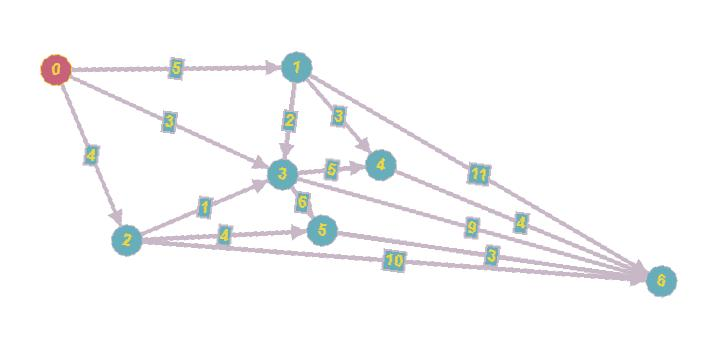

In [ ]:
# Cada posición de cada lista es el número de nodo
TARIFAS = [
[0,5,4,3,float("inf"),float("inf"),float("inf")],   #desde nodo 0
[float("inf"),0,float("inf"),2,3,float("inf"),11],  #desde nodo 1
[float("inf"),float("inf"), 0,1,float("inf"),4,10], #desde nodo 2
[float("inf"),float("inf"),float("inf"), 0,5,6,9],
[float("inf"),float("inf"), float("inf"),float("inf"),0,float("inf"),4],
[float("inf"),float("inf"), float("inf"),float("inf"),float("inf"),0,3],
[float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),0]
]

TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [ ]:
'''
  Calculo de la matriz de PRECIOS y RUTAS
  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
'''
def Precios(TARIFAS):
 
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [float("inf")]*N for i in [float("inf")]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  #para ir construyendo la matriz de PRECIOS
  # i es el nodo desde
  for i in range(N-1):
    # j es el nodo hasta
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      # k son todos los valores intermedios
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  # retornamos 2 estructuras auxiliares
  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)

In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

In [ ]:
print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,2,5'

# Ramificación y Poda: Asignación de tareas

In [ ]:
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]
        

In [ ]:
'''
  Establece el valor de una solucion S dada
'''
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR



valor((0,1,2,3),COSTES)

73

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

# Cota Inferior
def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

# Cota Superior
def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


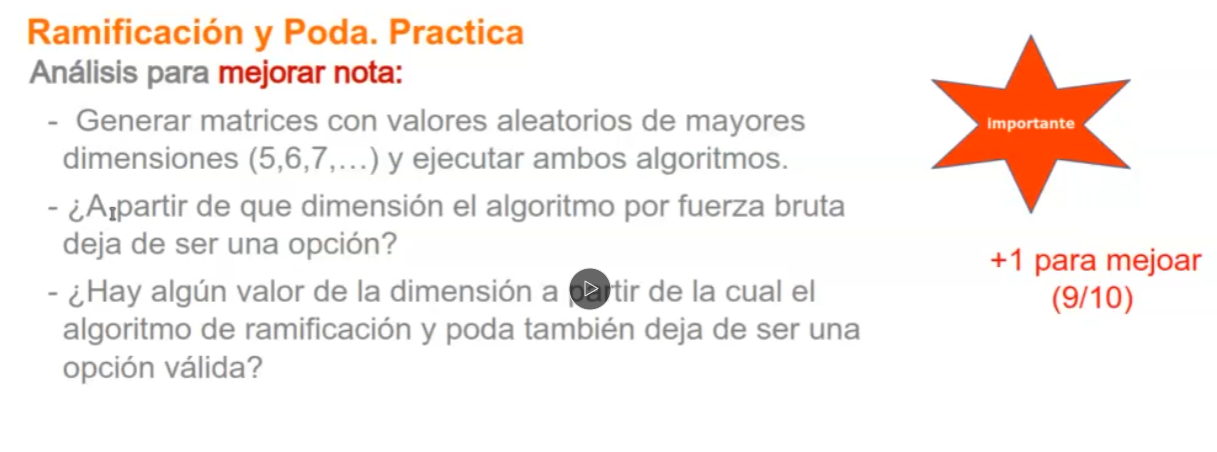